In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten,Input, concatenate
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
import tensorflow.keras.utils as utils

from datetime import datetime

from datetime import datetime
import cv2
import glob
import zipfile
import os
import shutil
import json
from tensorflow.keras.applications import Xception, ResNet50
from tensorflow.keras.applications import InceptionV3, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [212]:
!pip install -r Pythonwork/AI/content/yolov5/requirements.txt

In [211]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


## 경로설정

In [214]:
ROOT_DIR = "tomato_yolo/new/disease/Training"
TRAIN_ROOT_DIR = os.path.join(ROOT_DIR, "train")
TRAIN_DATA_ROOT_DIR = os.path.join(TRAIN_ROOT_DIR, "images")
TRAIN_LABEL_ROOT_DIR = os.path.join(TRAIN_ROOT_DIR, "labels")
VAL_ROOT_DIR = os.path.join(ROOT_DIR, "val")
VAL_DATA_ROOT_DIR = os.path.join(VAL_ROOT_DIR, "images")
VAL_LABEL_ROOT_DIR = os.path.join(VAL_ROOT_DIR, "labels")
TEST_ROOT_DIR = os.path.join(ROOT_DIR, "test")
TEST_DATA_ROOT_DIR = os.path.join(TEST_ROOT_DIR, "images")
TEST_LABEL_ROOT_DIR = os.path.join(TEST_ROOT_DIR, "labels")
DATA_ROOT_DIR = "C:/hojun13/Pythonwork/AI/content"
YOLOv5 = os.path.join(DATA_ROOT_DIR, "yolov5")
# len(os.listdir(ROOT_DIR))
# len(os.listdir(DATA_ROOT_DIR))
# os.listdir(VAL_ROOT_DIR)

## 현재 작업 위치 확인하고 편한 곳으로 바꾸기

In [205]:
os.getcwd()
# cd../ 

'C:\\hojun13'

## train, val, test폴더 생성하기

In [24]:
# file_list = os.listdir(TRAIN_ROOT_DIR)
# len(file_list)

if not os.path.exists(TRAIN_ROOT_DIR):
    os.mkdir(TRAIN_ROOT_DIR)
if not os.path.exists(VAL_ROOT_DIR):
    os.mkdir(VAL_ROOT_DIR)
if not os.path.exists(TEST_ROOT_DIR):
    os.mkdir(TEST_ROOT_DIR)

In [28]:
if not os.path.exists(TRAIN_DATA_ROOT_DIR):
    os.mkdir(TRAIN_DATA_ROOT_DIR)
if not os.path.exists(VAL_DATA_ROOT_DIR):
    os.mkdir(VAL_DATA_ROOT_DIR)
if not os.path.exists(TEST_DATA_ROOT_DIR):
    os.mkdir(TEST_DATA_ROOT_DIR)
    
if not os.path.exists(TRAIN_LABEL_ROOT_DIR):
    os.mkdir(TRAIN_LABEL_ROOT_DIR)
if not os.path.exists(VAL_LABEL_ROOT_DIR):
    os.mkdir(VAL_LABEL_ROOT_DIR)
if not os.path.exists(TEST_LABEL_ROOT_DIR):
    os.mkdir(TEST_LABEL_ROOT_DIR)

##  Train파일로 옮기기

In [25]:
file_name_list = os.listdir(os.path.join(ROOT_DIR, "[원천]잎마름병(토마토)_9.증강"))

In [26]:
image_name_list = os.listdir(os.path.join(ROOT_DIR, "[원천]잎마름병(토마토)_9.증강"))
label_name_list = os.listdir(os.path.join(ROOT_DIR, "[라벨]잎마름병(토마토)_9.증강"))
print(len(image_name_list), len(label_name_list))

3240 3240


In [32]:
move_rate = 0.2
split_num = int(0.2*len(image_name_list))
move_file_name= image_name_list[:split_num]
test_file_name = image_name_list[split_num:]

move_file_label = label_name_list[:split_num]
test_file_label = label_name_list[split_num:]

move_num =0
for file in move_file_name:
    shutil.move(os.path.join(ROOT_DIR+"/"+"[원천]잎마름병(토마토)_9.증강", file), os.path.join(VAL_DATA_ROOT_DIR, file))
#     shutil.move(os.path.join(ROOT_DIR, "val"), os.path.join(VAL_ROOT_DIR, "images"))
    move_num+=1
print(move_num, "is moving")

move_num = 0
for file in test_file_name:
    shutil.move(os.path.join(ROOT_DIR+"/"+"[원천]잎마름병(토마토)_9.증강", file), os.path.join(TRAIN_DATA_ROOT_DIR, file))
#     shutil.move(os.path.join(ROOT_DIR, "train"), os.path.join(TRAIN_ROOT_DIR, "images"))
    move_num +=1
print(move_num, "is moving")

for file in move_file_label:
    shutil.move(os.path.join(ROOT_DIR+"/"+"[라벨]잎마름병(토마토)_9.증강", file), os.path.join(VAL_ROOT_DIR, file))
    
    move_num+=1
print(move_num, "is moving")

move_num = 0
for file in test_file_label:
    shutil.move(os.path.join(ROOT_DIR+"/"+"[라벨]잎마름병(토마토)_9.증강", file), os.path.join(TRAIN_ROOT_DIR, file))
    move_num +=1
print(move_num, "is moving")

648 is moving
2592 is moving
3240 is moving
2592 is moving


## image, label 이름 따로따로 변수에 저장하기

In [160]:
raw_name = os.listdir(TRAIN_DATA_ROOT_DIR)
raw_label_file = os.listdir(TRAIN_ROOT_DIR)

In [161]:
del raw_label_file[:2]

In [162]:
file_path1 = os.path.join(TRAIN_ROOT_DIR, "images")
file_path2 = os.path.join(ROOT_DIR, "train")

In [163]:
raw_path = []
for i in range(len(raw_name)):
    raw_path.append(file_path1+"{}".format(raw_name[i]))
print(len(raw_path))

raw_label = []
for i in range(len(raw_label_file)):
    raw_label.append(file_path2+"/"+"{}".format(raw_label_file[i]))
print(len(raw_label))

2592
2592


In [136]:
raw_val_name = os.listdir(VAL_DATA_ROOT_DIR)
raw_val_label_file = os.listdir(VAL_ROOT_DIR)

In [137]:
del raw_val_label_file[:2]

In [138]:
file_path3 = os.path.join(VAL_ROOT_DIR, "images")
file_path4 = os.path.join(ROOT_DIR, "val")

In [139]:
raw_val_path = []
for i in range(len(raw_val_name)):
    raw_val_path.append(file_path3+"{}".format(raw_val_name[i]))
print(len(raw_val_path))

raw_val_label = []
for i in range(len(raw_val_label_file)):
    raw_val_label.append(file_path4+"/"+"{}".format(raw_val_label_file[i]))
print(len(raw_val_label))

648
648


## (1) TRAIN JSON파일 읽어와서 좌표 변수에 저장하기(정규화까지)

In [164]:
raw_json = []

# 리스트에 폴더안에 파일 이름 담기

for i in range(len(raw_label)):
    with open(raw_label[i], "r", encoding="utf-8") as j :
        raw_json.append(json.loads(j.read()))

In [165]:
label = ["xtl", "ytl", "xbr", "ybr"]
to_num = []
for k in range(len(raw_label)):
    for i in label:
        to_num.append(raw_json[k]["annotations"]["points"][0]["{}".format(i)])

In [166]:
ax_num = []

for i in range(0, len(to_num), 4):
    ax_num.append([round(to_num[i]/raw_json[i//4]["description"]["width"],6), 
                   round(to_num[i+1]/raw_json[i//4]["description"]["height"],6), 
                   round(to_num[i+2]/raw_json[i//4]["description"]["width"],6), 
                   round(to_num[i+3]/raw_json[i//4]["description"]["height"],6)])

## (2) VAL

In [149]:
raw_val_json = []

# 리스트에 폴더안에 파일 이름 담기

for i in range(len(raw_val_label)):
    with open(raw_val_label[i], "r", encoding="utf-8") as j :
        raw_val_json.append(json.loads(j.read()))

In [150]:
label = ["xtl", "ytl", "xbr", "ybr"]
to_num = []
for k in range(len(raw_val_label)):
    for i in label:
        to_num.append(raw_val_json[k]["annotations"]["points"][0]["{}".format(i)])

In [151]:
ax_num = []

for i in range(0, len(to_num), 4):
    ax_num.append([round(to_num[i]/raw_val_json[i//4]["description"]["width"],6), 
                   round(to_num[i+1]/raw_val_json[i//4]["description"]["height"],6), 
                   round(to_num[i+2]/raw_val_json[i//4]["description"]["width"],6), 
                   round(to_num[i+3]/raw_val_json[i//4]["description"]["height"],6)])

{'description': {'image': 'V006_79_1_15_07_03_12_1_2656z_20201104_19_a0001.jpg',
  'date': '2020/11/04',
  'worker': '',
  'height': 3024,
  'width': 4032,
  'task': 79,
  'type': 1,
  'region': 5,
  'original': 'V006_79_1_15_07_03_12_1_2656z_20201104_19.jpg'},
 'annotations': {'disease': 15,
  'crop': 7,
  'area': 3,
  'grow': 12,
  'risk': 1,
  'points': [{'xtl': 1504, 'ytl': 1472, 'xbr': 2286, 'ybr': 3023}]},
 'augmented': {'brightness': 0.9870409693077319,
  'contrast': 1.1371315556080022,
  'saturation': 1.110644765656731,
  'hue': 0.04147764845827745,
  'transpose': 0,
  'hflip': 1,
  'vflip': 0}}

## (1) TRAIN 좌표 Text파일로 저장하기

In [92]:
ax_num[8]

[0.008333, 0.245833, 0.261111, 0.490625]

In [168]:
images = []
for i in  range(len(raw_name)):
    images.append(raw_name[i].split(".jpg")[0])

In [169]:
print(images[0])

V006_79_1_15_07_03_12_1_8540w_20201106_147_a0003


In [170]:
copy_num = 0
for i in range(len(raw_json)):
    file_path = "tomato_yolo/new/disease/Training/train/labels/{}.txt".format(images[i])
    with open(file_path, "w") as file:
        file.write("{}".format(ax_num[i]))
        copy_num+=1
print(copy_num, "is pefectly copied")

2592 is pefectly copied


## (2)VAL

In [ ]:
images = []
for i in  range(len(raw_val_name)):
    images.append(raw_val_name[i].split(".jpg")[0])

In [ ]:
copy_num = 0
for i in range(len(raw_val_json)):
    file_path = "tomato_yolo/new/disease/Training/val/labels/{}.txt".format(images[i])
    with open(file_path, "w") as file:
        file.write("{}".format(ax_num[i]))
        copy_num+=1
print(copy_num, "is pefectly copied")

## BBOX 라벨링 확인하기

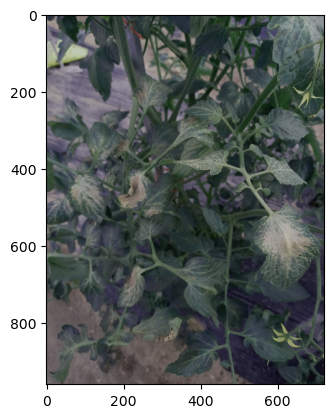

In [98]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

i = 5
# 이미지 경로
image_path ="tomato_yolo/new/disease/Training/train/images/{}".\
format(images[i]+".jpg")
# 라벨링된 바운딩 박스 좌표
box_coordinates = [
    ax_num[i]  # 첫 번째 바운딩 박스 좌표 [x, y, width, height] # 두 번째 바운딩 박스 좌표 [x, y, width, height]
]

# 이미지 로드
image = Image.open(image_path)

# 이미지를 pyplot figure로 변환
fig, ax = plt.subplots(1)
ax.imshow(image)

# 바운딩 박스 좌표를 이용하여 라벨링된 영역 표시
for box in box_coordinates:
    xtl, ytl, xbr, ybr = box
    x = xtl
    y = ytl
    width = xbr - xtl
    height = ybr - ytl
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor="r", facecolor="none")
    ax.add_patch(rect)

# 이미지 출력
plt.show()

In [233]:
ROOT_DIR = "tomato_yolo/new/disease/Training"

## YAML 파일 생성후 설정

In [234]:
import yaml

with open(os.path.join(ROOT_DIR, "새 텍스트 문서.yaml"), "r") as f:
    data = yaml.safe_load(f)

In [241]:
data["train"] = os.path.join(ROOT_DIR, "train/images")
data["val"] = os.path.join(ROOT_DIR, "val/images")

data["nc"] = 2
data["names"] = ["normal", "sick"]

with open(os.path.join(ROOT_DIR, "data.yaml"), "w") as f:
    yaml.dump(data, f)

## YOLO 학습

In [242]:
img_size= 416
batch_size=32
epochs=30

data_path = os.path.join(ROOT_DIR, "data.yaml")
yaml_path = os.path.join(YOLOv5,"models/yolov5s.yaml")
weights_path = os.path.join(YOLOv5, "yolov5s.pt")

!python {os.path.join(YOLOv5, "train.py")} --img {img_size} --batch {batch_size}\
    --epochs {epochs} --data {data_path} --cfg {yaml_path} \
    --weights {weights_path}

train: weights=C:/hojun13/Pythonwork/AI/content\yolov5\yolov5s.pt, cfg=C:/hojun13/Pythonwork/AI/content\yolov5\models/yolov5s.yaml, data=tomato_yolo/new/disease/Training\data.yaml, hyp=Pythonwork\AI\content\yolov5\data\hyps\hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Pythonwork\AI\content\yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 7 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-178-ga199480 Python-3.9.13 torch-2.0.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, mom

'C:/hojun13/Pythonwork/AI/content\\yolov5\\yolov5s.pt'

## YOLO Detection

In [ ]:
test_data_path = os.path.join(ROOT_DIR, "test/images/")
# best_weights

!python content/yolov5/detect.py --weights content/yolov5/runs/train/exp3/weights/best.pt \
        --source content/images --img 416 --conf 0.5